# CS181 P3 Explore Train and Test Data by Visualization

In [2]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy
import torch

# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

## Part I Set up parameters for transform & load in data
### 1. load in data
#### load 100 rows of data

In [4]:
# load 100 rows of data
df_train = pd.read_csv("train.csv",header=None,nrows=100)
df_test = pd.read_csv("test.csv",header=None,nrows=100)

#### specify feature space

In [5]:
# specify feature space
X_train = df_train.values[:,:-1]
X_test = df_test.values[:,1:]
Y_train = df_train.values[:,-1]
N_train = X_train.shape

#### class of loaded training datum

In [6]:
# see the class of loaded training set
Y_train

array([ 5.,  0.,  8.,  8.,  5.,  0.,  4.,  9.,  9.,  0.,  9.,  2.,  9.,
        0.,  8.,  5.,  0.,  9.,  7.,  0.,  0.,  0.,  7.,  9.,  5.,  9.,
        0.,  7.,  0.,  2.,  9.,  8.,  9.,  5.,  0.,  2.,  5.,  8.,  9.,
        0.,  9.,  7.,  0.,  9.,  0.,  3.,  0.,  7.,  7.,  0.,  0.,  5.,
        0.,  2.,  9.,  2.,  8.,  7.,  0.,  7.,  2.,  5.,  8.,  0.,  4.,
        9.,  2.,  4.,  4.,  0.,  7.,  9.,  0.,  5.,  9.,  2.,  4.,  0.,
        0.,  0.,  0.,  0.,  7.,  0.,  5.,  9.,  0.,  0.,  2.,  0.,  8.,
        4.,  7.,  5.,  7.,  5.,  0.,  8.,  8.,  9.])

### 2. Set up for parameters
#### (1) CQT transform
https://librosa.github.io/librosa/generated/librosa.core.cqt.html

Compute the constant-Q transform of an audio signal

In [10]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES
SAMPLE_RATE = 22050

fucntion to plot the spectrogram

In [8]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

## Part II Spectrogram, Audio & scatter plot of mean and variance per frequency
training - class 5 

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


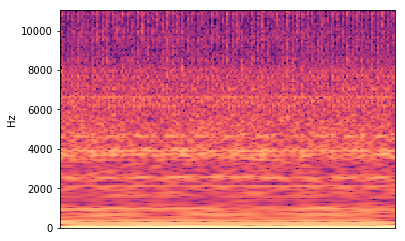

In [11]:
librosa.display.specshow(mel_spec(X_train[0]), y_axis='hz')
plt.savefig('5_train.pdf')

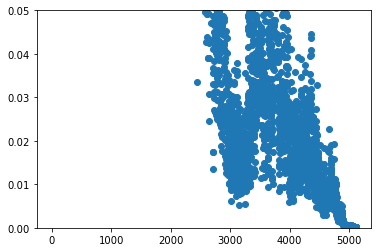

In [14]:
hz = list(range(5121))
var = np.var(np.abs(librosa.stft(X_train[0], n_fft=10240)), axis=1).real
plt.scatter(hz,var)
plt.ylim((0,0.05))
plt.show()

In [15]:
ipd.Audio(X_train[0], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


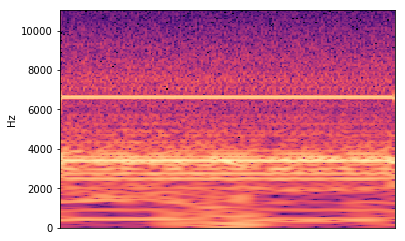

In [16]:
librosa.display.specshow(mel_spec(X_train[4]), y_axis='hz')
plt.savefig('5_train_2.pdf')

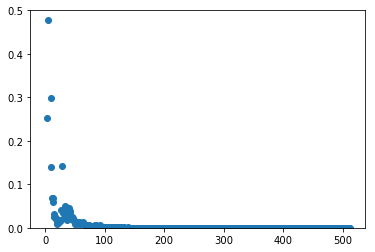

In [20]:
hz = list(range(513))
var = np.var(np.abs(librosa.stft(X_train[4], n_fft=1024)), axis=1).real
plt.scatter(hz,var)
plt.ylim((0,0.5))
plt.savefig('var_5_train_2.pdf')
plt.show()

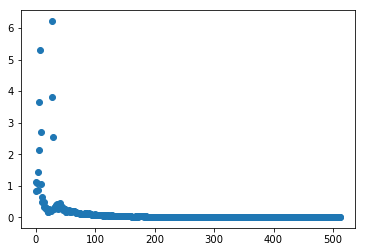

In [109]:
hz = list(range(513))
mn = np.mean(np.abs(librosa.stft(X_train[4], n_fft=1024)), axis=1).real
plt.scatter(hz,mn)
#plt.ylim((0,0.00005))
plt.show()

In [61]:
ipd.Audio(X_train[4], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


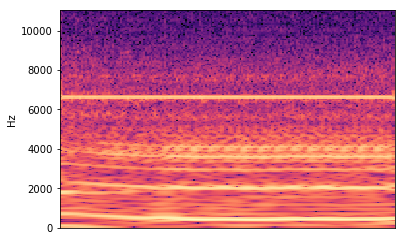

In [59]:
librosa.display.specshow(mel_spec(X_train[15]), y_axis='hz')
plt.savefig('5_train_3.pdf')

In [62]:
ipd.Audio(X_train[15], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


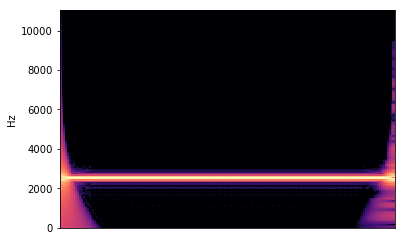

In [63]:
librosa.display.specshow(mel_spec(X_train[1]), y_axis='hz')
plt.savefig('0_train.pdf')

In [64]:
ipd.Audio(X_train[1], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


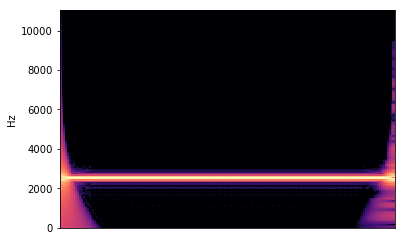

In [65]:
librosa.display.specshow(mel_spec(X_train[5]), y_axis='hz')
plt.savefig('0_train_2.pdf')

In [66]:
ipd.Audio(X_train[5], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


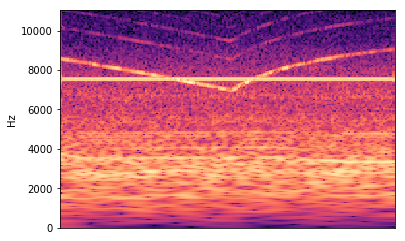

In [68]:
librosa.display.specshow(mel_spec(X_train[2]), y_axis='hz')
plt.savefig('8_train.pdf')

In [69]:
ipd.Audio(X_train[2], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


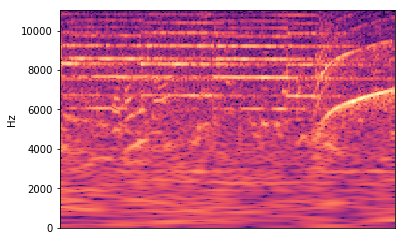

In [70]:
librosa.display.specshow(mel_spec(X_train[3]), y_axis='hz')
plt.savefig('8_train_2.pdf')

In [71]:
ipd.Audio(X_train[3], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


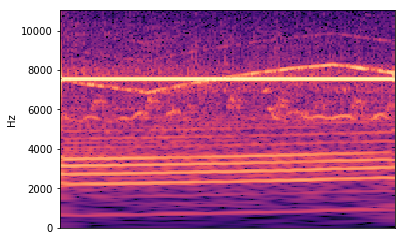

In [72]:
librosa.display.specshow(mel_spec(X_train[14]), y_axis='hz')
plt.savefig('8_train_3.pdf')

In [73]:
ipd.Audio(X_train[14], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


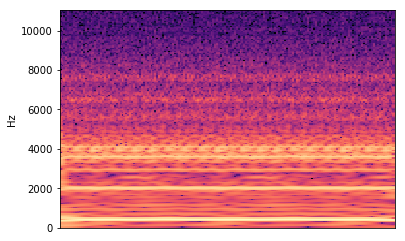

In [74]:
librosa.display.specshow(mel_spec(X_test[0]), y_axis='hz')
plt.savefig('test_1.pdf')

In [75]:
ipd.Audio(X_test[0], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


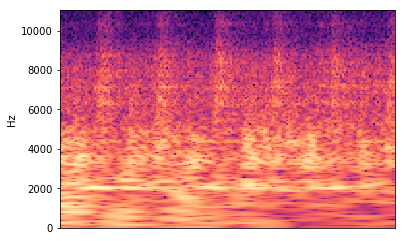

In [76]:
librosa.display.specshow(mel_spec(X_test[1]), y_axis='hz')
plt.savefig('test_2.pdf')

In [77]:
ipd.Audio(X_test[1], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


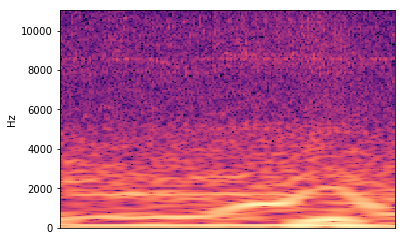

In [78]:
librosa.display.specshow(mel_spec(X_test[2]), y_axis='hz')
plt.savefig('test_3.pdf')

In [79]:
ipd.Audio(X_test[2], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


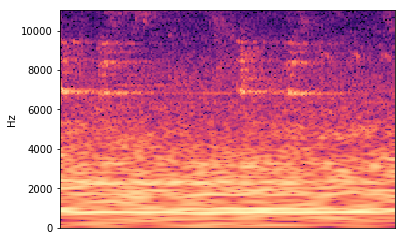

In [80]:
librosa.display.specshow(mel_spec(X_test[3]), y_axis='hz')
plt.savefig('test_4.pdf')

In [82]:
ipd.Audio(X_test[3], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


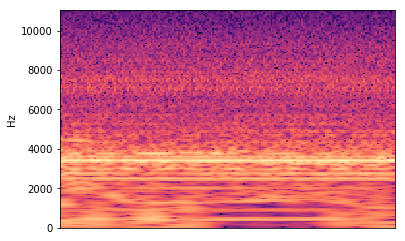

In [83]:
librosa.display.specshow(mel_spec(X_test[4]), y_axis='hz')
plt.savefig('test_5.pdf')

In [84]:
ipd.Audio(X_test[4], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


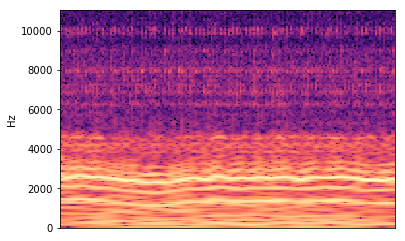

In [85]:
librosa.display.specshow(mel_spec(X_test[5]), y_axis='hz')
plt.savefig('test_6.pdf')

In [86]:
ipd.Audio(X_test[5], rate=SAMPLE_RATE)

/Users/xihanzhang/anaconda/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


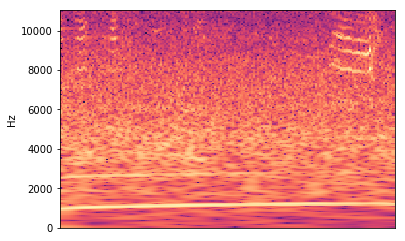

In [87]:
librosa.display.specshow(mel_spec(X_test[6]), y_axis='hz')
plt.savefig('test_7.pdf')

In [88]:
ipd.Audio(X_test[6], rate=SAMPLE_RATE)